In [229]:
# Importing Libraries 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import normalize
from sklearn.metrics import silhouette_score
from scipy.optimize import curve_fit
from sklearn.linear_model import LinearRegression


In [231]:
# Load the data
data = pd.read_csv('Mall_Customers.csv')

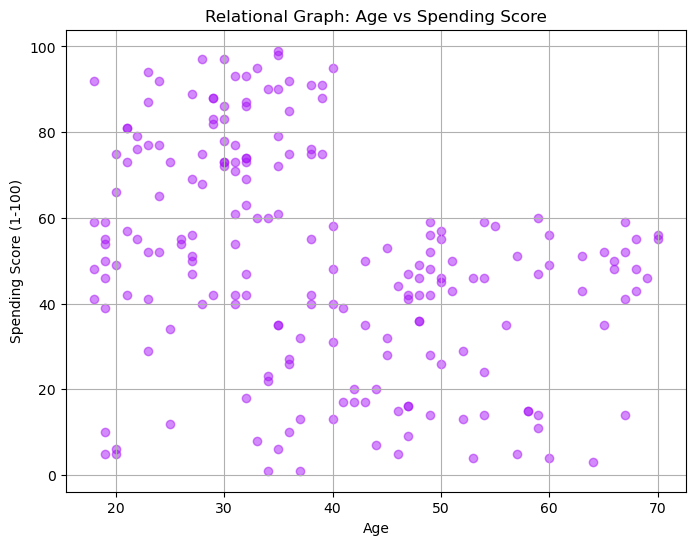

In [264]:
"""Relational graph to show the relationship between Age and Spending Score."""
#define function for relational graph:
def relational_graph(data):
    plt.figure(figsize=(8, 6))
    plt.scatter(data['Age'], data['Spending Score (1-100)'], color='#a816f7', alpha=0.5)
    plt.xlabel('Age')
    plt.ylabel('Spending Score (1-100)')
    plt.title('Relational Graph: Age vs Spending Score')
    plt.grid(True)
    plt.show()
    
#print:    
relational_graph(data)

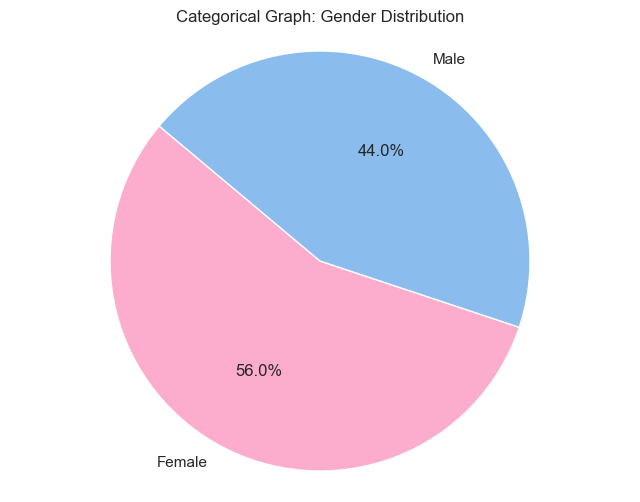

In [272]:
"""Categorical graph to compare the distribution of Gender."""
# Define function for categorical_graph to create a pie chart:
sns.set(style="whitegrid")
def categorical_graph(data):
    gender_counts = data['Gender'].value_counts()
    colors = ['#fcaccd', '#8abded']  
    plt.figure(figsize=(8, 6))
    plt.pie(gender_counts, labels=gender_counts.index, colors=colors, autopct='%1.1f%%', startangle=140)
    plt.title('Categorical Graph: Gender Distribution')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

#print:
categorical_graph(data)


C:\Users\MANASA YADLAPALLI\AppData\Local\Temp\ipykernel_25232\1268434352.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='Annual Income (k$)', data=data, palette='rocket')


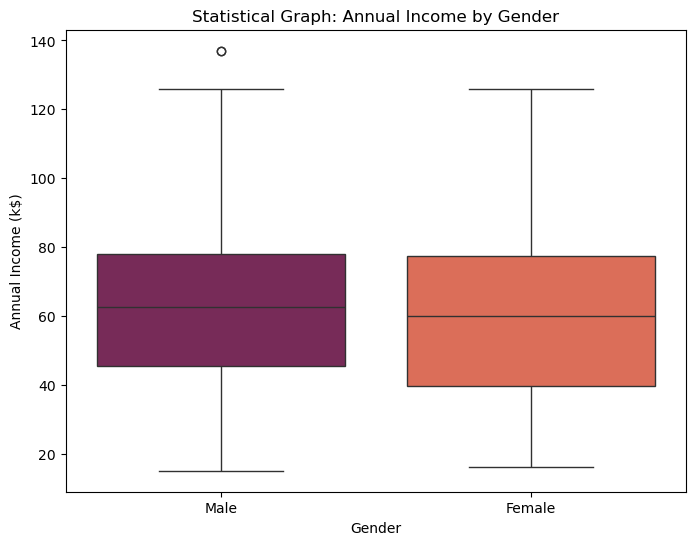

In [260]:
""" The graph will a box plot, displaying the distribution of 'Annual Income (k$)'."""
# Statistical Graph:
def statistical_graph(data):
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Gender', y='Annual Income (k$)', data=data, palette='rocket')
    plt.xlabel('Gender')
    plt.ylabel('Annual Income (k$)')
    plt.title('Statistical Graph: Annual Income by Gender')
    plt.show()
    
#print:
statistical_graph(data)


In [ ]:
# Overview of the Dataset
data_info = data.describe()

In [52]:
data_info

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [53]:
#Computing Statistics for 'Annual Income'
annual_income_stats = {
    'Mean': data['Annual Income (k$)'].mean(),
    'Median': data['Annual Income (k$)'].median(),
    'Standard Deviation': data['Annual Income (k$)'].std(),
    'Skewness': data['Annual Income (k$)'].skew(),
    'Kurtosis': data['Annual Income (k$)'].kurtosis()
    }

print("\nStatistics for Annual Income:")
for key, value in annual_income_stats.items():
    print(f"{key}: {value}")


Statistics for Annual Income:
Mean: 60.56
Median: 61.5
Standard Deviation: 26.264721165271254
Skewness: 0.3218425498619055
Kurtosis: -0.09848708652696203


In [54]:
#Computing Statistics for 'Spending Score'
spending_score_stats = {
    'Mean': data['Spending Score (1-100)'].mean(),
    'Median': data['Spending Score (1-100)'].median(),
    'Standard Deviation': data['Spending Score (1-100)'].std(),
    'Skewness': data['Spending Score (1-100)'].skew(),
    'Kurtosis': data['Spending Score (1-100)'].kurtosis()
     }
print("\nStatistics for Spending Score:")
for key, value in spending_score_stats.items():
    print(f"{key}: {value}")


Statistics for Spending Score:
Mean: 50.2
Median: 50.0
Standard Deviation: 25.823521668370162
Skewness: -0.047220201374263374
Kurtosis: -0.8266291062061502


In [55]:
#Correlation Matrix
numeric_data = data.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numeric_data.corr()
print(correlation_matrix)

                        CustomerID       Age  Annual Income (k$)  \
CustomerID                1.000000 -0.026763            0.977548   
Age                      -0.026763  1.000000           -0.012398   
Annual Income (k$)        0.977548 -0.012398            1.000000   
Spending Score (1-100)    0.013835 -0.327227            0.009903   

                        Spending Score (1-100)  
CustomerID                            0.013835  
Age                                  -0.327227  
Annual Income (k$)                    0.009903  
Spending Score (1-100)                1.000000  


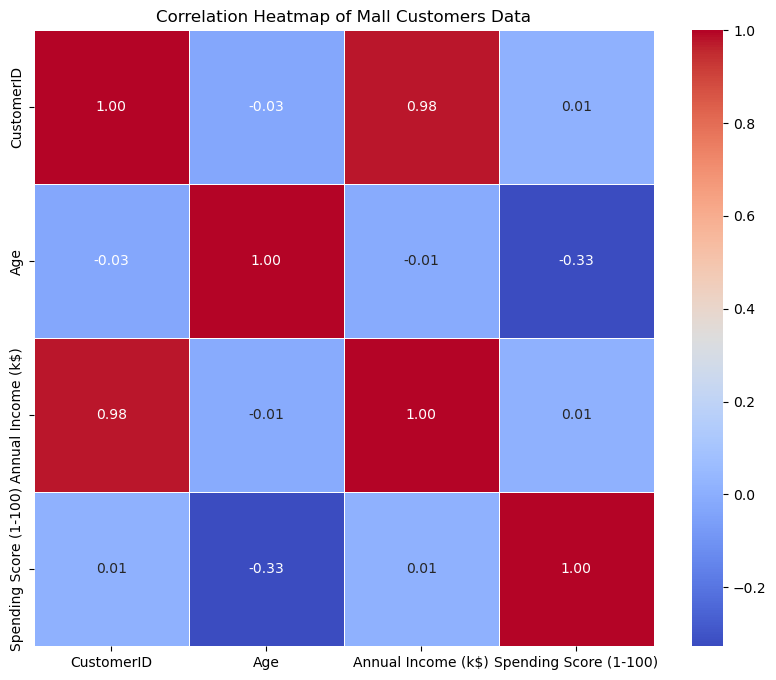

In [259]:
""" Correlation heatmap of Mall Customers Data """
# Exclude non-numeric columns (e.g., 'Gender')
numeric_data = data.select_dtypes(include=['int64', 'float64'])

# Compute the correlation matrix
corr = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Mall Customers Data')
plt.show()

C:\Users\MANASA YADLAPALLI\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


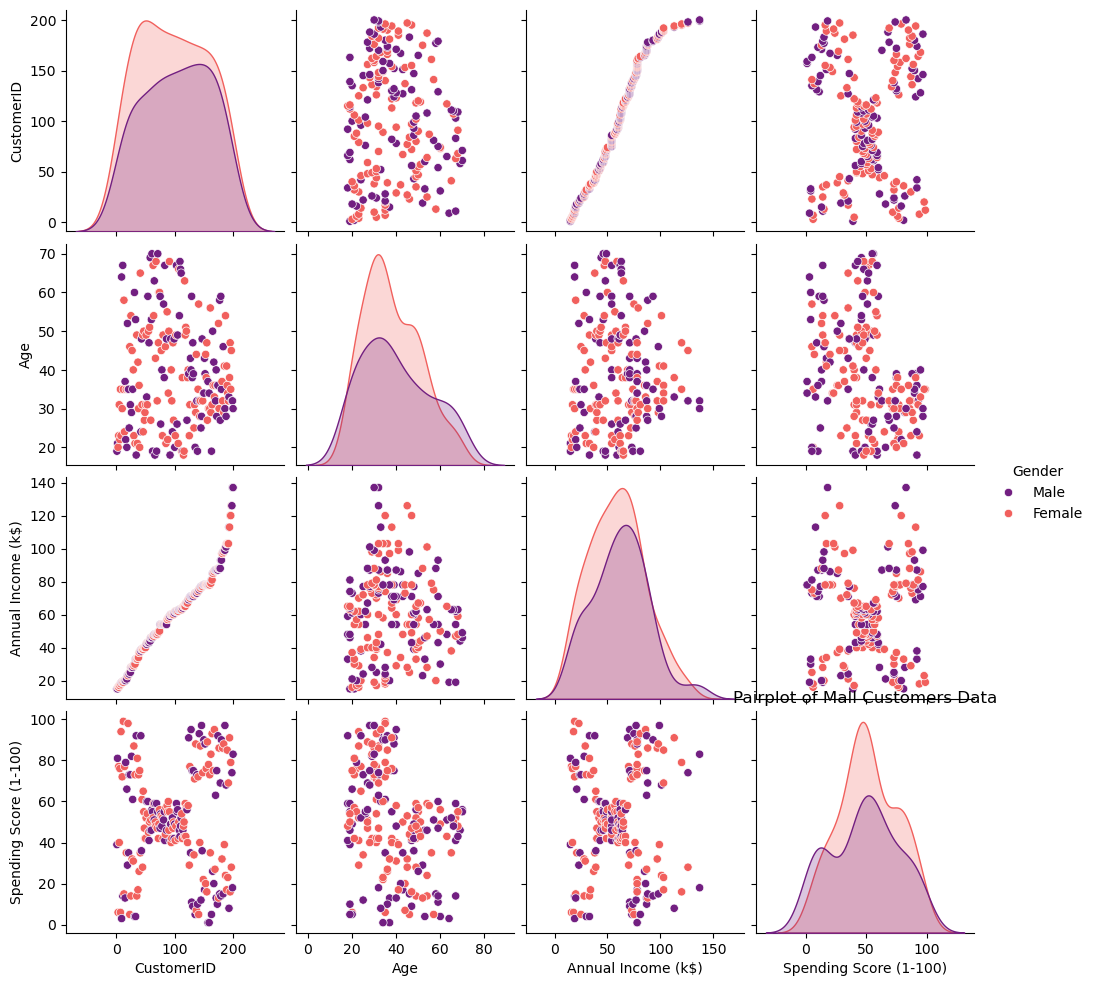

In [258]:
"""This is a Pairplot"""
#Visualization - Pairplot
sns.pairplot(data=data, hue='Gender', palette='magma')
plt.title('Pairplot of Mall Customers Data')
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

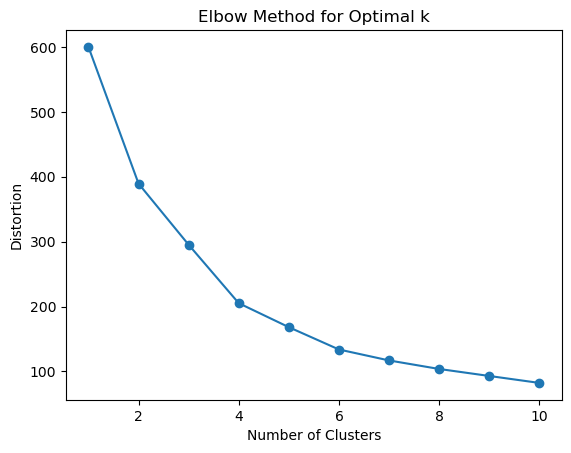

In [257]:
"""Using Elbow method """
#Define Function for Elbow Method
def determine_num_clusters_elbow(data):
    distortions = []
    for i in range(1, 11):
        kmeans = KMeans(n_clusters=i, random_state=42)
        kmeans.fit(data)
        distortions.append(kmeans.inertia_)

    # Plotting the Elbow Method
    plt.plot(range(1, 11), distortions, marker='o')
    plt.title('Elbow Method for Optimal k')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Distortion')
    plt.show()
    
#Select Relevant Features
X = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

#Normalize and Scale the Data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

# Determine Elbow method
determine_num_clusters_elbow(scaled_data)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

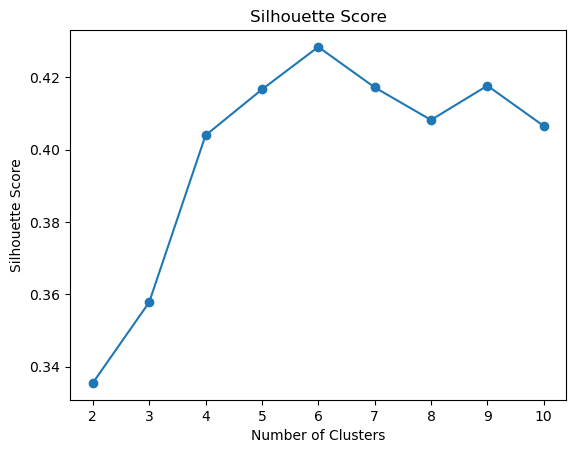

In [256]:
"""Plotting Silhouette Score Graph """
#Define Function for Silhouette Score:
def determine_num_clusters_silhouette(data):
    silhouette_scores = []
    for num_clusters in range(2, 11):
        kmeans = KMeans(n_clusters=num_clusters, random_state=42)
        cluster_labels = kmeans.fit_predict(data)
        silhouette_scores.append(silhouette_score(data, cluster_labels))
    
    # Plotting the Silhouette Scores
    plt.plot(range(2, 11), silhouette_scores, marker='o')
    plt.title('Silhouette Score')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.show()

# Select revelant features
X = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

#Normalize and Scale the Data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

#Determine the Silhouette Score
determine_num_clusters_silhouette(scaled_data)

In [158]:
"""performs clustering which returns an additional 'Cluster' column indicating the assigned cluster for each data point. """
# Clustering Function
def clustering_function(data, num_clusters):
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data)
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    clusters = kmeans.fit_predict(scaled_data)
    data_with_clusters = data.copy()
    data_with_clusters['Cluster'] = clusters
    return data_with_clusters

# Select Relevant Features
X = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Perform KMeans Clustering with Optimal Number of Clusters
num_clusters = 5 
clustered_data = clustering_function(X, num_clusters)

# Printing the Clustered Data
print("Clustered Data:\n", clustered_data.head())

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Clustered Data:
    Age  Annual Income (k$)  Spending Score (1-100)  Cluster
0   19                  15                      39        1
1   21                  15                      81        1
2   20                  16                       6        0
3   23                  16                      77        1
4   31                  17                      40        1


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


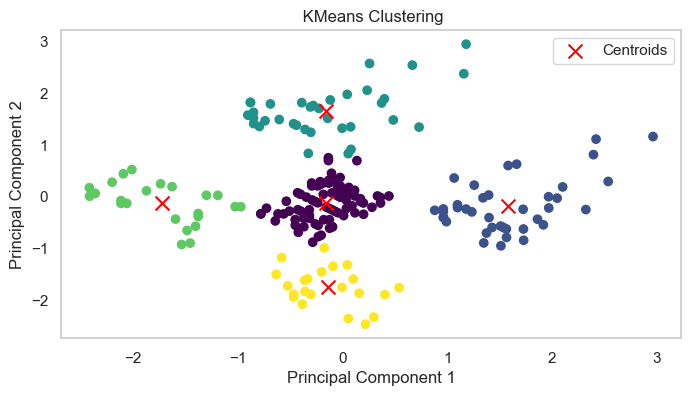

In [282]:
""" performing Clustered Mall Customer(PCA) """
# Select relevant features
X = mall_customers[['Annual Income (k$)', 'Spending Score (1-100)']].values

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Optimal number of clusters
optimal_n_clusters = 5

# Perform K-Means clustering
kmeans = KMeans(n_clusters=optimal_n_clusters, n_init=10, random_state=0)
kmeans.fit(X_pca)

# Assign clusters to each data point
clusters = kmeans.predict(X_pca)

# Visualize the clusters
plt.figure(figsize=(8, 4))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=100, c='red', label='Centroids')
plt.title(' KMeans Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid()
plt.show()


In [194]:
 """ Fitted linear regression model """
# Fitting function: 
def fitting_function(data, target_column, feature_columns):
    X = data[feature_columns]
    y = data[target_column]

    #Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    #Fit the linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    #Evaluate the quality of the fitting
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print("Mean Squared Error:", mse)
    return model

# Choose target and feature columns
target_column = 'Spending Score (1-100)'
feature_columns = ['Age', 'Annual Income (k$)']

# Fit the model
model = fitting_function(data, target_column, feature_columns)

Mean Squared Error: 483.55682175408344


In [217]:
data2=data
group=data2.groupby('Age')

In [219]:
groupmean=group.mean('Age')
groupmean=groupmean.reset_index()

In [220]:
groupmean

,Age,CustomerID,Annual Income (k$),Spending Score (1-100)
0,18,76.750000,51.250000,60.000000
1,19,97.000000,57.000000,39.750000
2,20,59.200000,41.600000,40.200000
3,21,52.200000,38.800000,66.800000
4,22,36.666667,31.333333,70.000000
5,23,57.833333,41.500000,63.333333
6,24,49.500000,39.250000,71.500000
7,25,100.000000,57.666667,39.666667
8,26,90.000000,58.000000,54.500000
9,27,110.000000,63.166667,60.333333


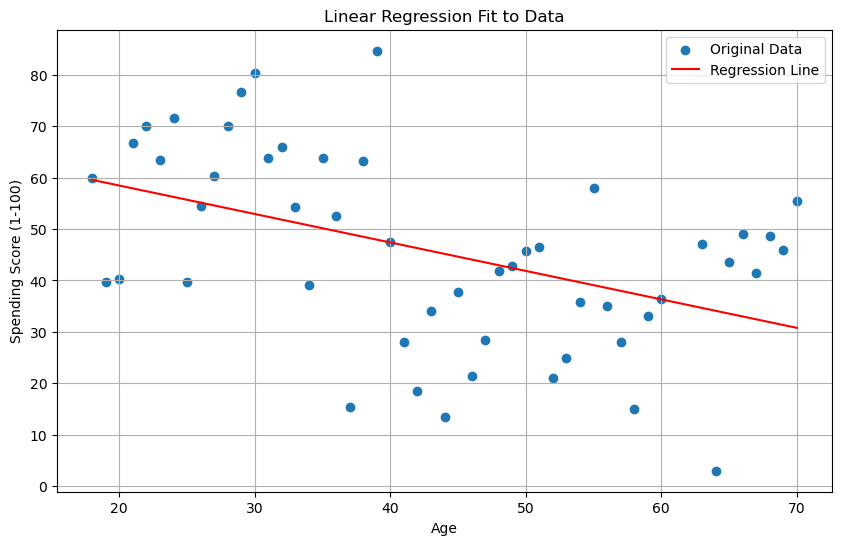

In [254]:
""" This a Linear regression model with the age and spending score data"""
# Creating Linear Regression Fit to Data
x =  groupmean['Age'].values.reshape(-1, 1)
y =  groupmean['Spending Score (1-100)'].values.reshape(-1, 1)

model = LinearRegression()

# Fit the model to the data
model.fit(x, y)

# Predict values using the model
y_pred = model.predict(x)

# Plot the original data and the regression line
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Original Data')
plt.plot(x, y_pred, color='red', label='Regression Line')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.title('Linear Regression Fit to Data')
plt.legend()
plt.grid(True)
plt.show()
